In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix 

In [2]:
df = pd.read_csv('./data/creditcard.csv')
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


None

### Data Preprocessing

In [3]:
X = df.drop(columns=['Time', 'Class'])
y = df['Class']  
print(f'X shape {X.shape}, y shape {y.shape} fraud cases {y.sum()}')
display('y_value counts',y.value_counts(), df.Class)

X shape (284807, 29), y shape (284807,) fraud cases 492


'y_value counts'

0    284315
1       492
Name: Class, dtype: int64

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Class'>

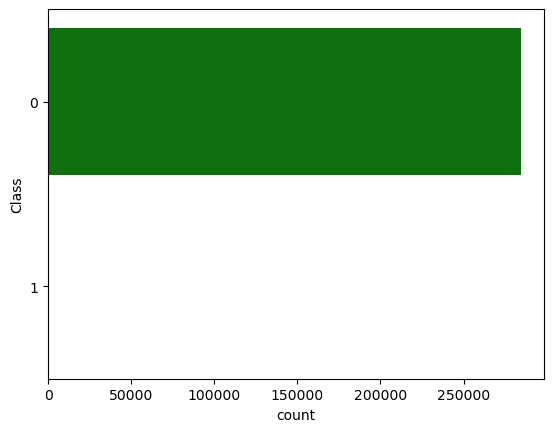

In [4]:
sn.countplot(y='Class', data=df, palette=['green', 'blue'])

The count plot above shows that we have an imbalance dataset where fraud cases are rare than the non fraud cases, this my lead our model to classify almost every case as the majority class which is the non fraud case

In [5]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
sc = StandardScaler()
X_train = sc.fit(X_train).transform(X_train)
print(X_train.shape , y_train.shape)

(199364, 29) (199364,)


### Model Evaluation / Selection


Due to imbalance in our dataset we will use f1_score and confusion matrix for our model evaluation

In [6]:
def heatmap(y_test, preds):
    plt.figure(figsize=(9,9))
    cm = confusion_matrix(y_test, preds)
    sn.heatmap(cm, annot=True, linewidths=.5, cmap='Blues_r', square=True, fmt='.3f')
    plt.ylabel('Actual')
    plt.xlabel('predicted')
    plt.title(f'f1_score {f1_score(y_test, preds)}', size=15)
    print(f'total number of fraud cases {preds.sum()}')


total number of fraud cases 134


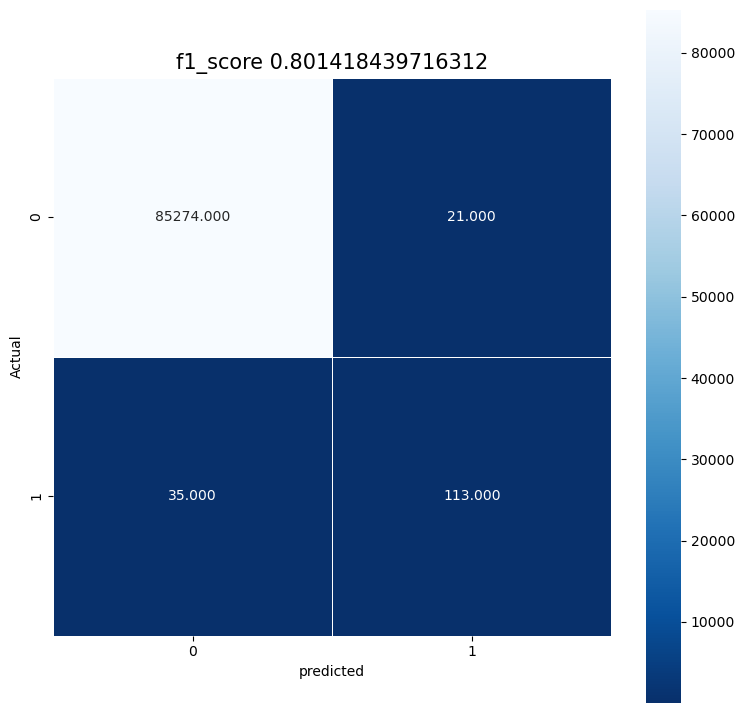

In [7]:
gbc=HistGradientBoostingClassifier(learning_rate=0.01, 
        max_iter=2000, max_leaf_nodes=6, validation_fraction=0.2, 
        n_iter_no_change=15, random_state=42).fit(X_train,y_train)
preds = gbc.predict(X_test.values)
heatmap(y_test, preds)


In [8]:
rdc = RandomForestClassifier(n_estimators=500,)
rdc.fit(X_train, y_train)
preds = rdc.predict(X_test.values)
heatmap(y_test, preds)